Determination of partial contributions of hadrons
-------------------------------------------------

This notebook reproduces Figure 9 from the proceedings arXiv:1503.00544.  

In [1]:
#basic imports and ipython setup
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
import matplotlib.pyplot as plt
import numpy as np
os.chdir('..')

#import solver related modules
from MCEq.core import MCEqRun
from mceq_config import config
#import primary model choices
import CRFluxModels as pm

In [9]:
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model='SIBYLL2.3_rc1',
#primary cosmic ray flux model
#support a tuple (primary model class (not instance!), arguments)
primary_model=(pm.HillasGaisser2012, "H3a"),#(pm.Thunman, None),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0,
#expand the rest of the options from mceq_config.py
**config
)

('w', array([  1.52021757e+01,   1.98242986e+01,   2.58517480e+01,
         3.37118043e+01,   4.39616597e+01,   5.73279172e+01,
         7.47580986e+01,   9.74878135e+01,   1.27128351e+02,
         1.65780901e+02,   2.16185509e+02,   2.81915311e+02,
         3.67629832e+02,   4.79405298e+02,   6.25165370e+02,
         8.15242845e+02,   1.06311214e+03,   1.38634450e+03,
         1.80785355e+03,   2.35751969e+03,   3.07430826e+03,
         4.00903175e+03,   5.22795185e+03,   6.81747670e+03,
         8.89028627e+03,   1.15933201e+04,   1.51181939e+04,
         1.97147827e+04,   2.57089346e+04,   3.35255693e+04,
         4.37188012e+04,   5.70112192e+04,   7.43451106e+04,
         9.69492592e+04,   1.26426053e+05,   1.64865074e+05,
         2.14991230e+05,   2.80357919e+05,   3.65598926e+05,
         4.76756908e+05,   6.21711754e+05,   8.10739180e+05,
         1.05723917e+06,   1.37868588e+06,   1.79786638e+06,
         2.34449599e+06,   3.05732479e+06,   3.98688456e+06,
         5.1990709

In [10]:
res_groups = [
    (["D+", "D-", "D0", "D0-bar", "D*+", "D*-", "D*0", "D*0-bar"], r"$D^\pm + D^0$"),
    (["Ds+", "Ds-"], r"$D_s$"),
    (["K0S"], r"$K^0_s$"),
    (["K0L"], r"$K^0_L$"),
    (["LambdaC+", "LambdaC+-bar"], r'$\Lambda_C$'),
    (["OmegaC0", "OmegaC0-bar", "XiC+", 
      "XiC+-bar", "XiC0", "XiC0-bar", 
      "SigmaC*+", "SigmaC*++", "tau+", "tau-", 
      "SigmaC*++-bar", "SigmaC*+-bar", "SigmaC*0", 
      "SigmaC*0-bar", "SigmaC+", "SigmaC++", 
      "SigmaC++-bar", "SigmaC+-bar", "SigmaC0", 
      "SigmaC0-bar"], r"other prompt"),
    (["K0S", "K0L", "n", "n-bar", "p", "p-bar", 
      "Lambda0", "Lambda0-bar", "Sigma-", 
      "Sigma--bar", "Xi-", "Xi--bar", "Xi0", 
      "Xi0-bar", "Delta-", "Delta--bar", "Delta0", 
      "Delta0-bar", "K*+", "K*-", "K*0", "K*0-bar", 
      "Omega-", "Omega--bar", "Sigma*+", "Sigma*+-bar", 
      "Sigma*-", "Sigma*--bar", "Sigma*0", "Sigma*0-bar", 
      "Sigma+", "Sigma+-bar", "Sigma0", "Sigma0-bar", 
      "Delta+", "Delta++", "Delta++-bar", "Delta+-bar", 
      "Xi*-", "Xi*--bar", "Xi*0", "Xi*0-bar"],r"other conv. mu"),
    (["K0S", "K0L", "n", "n-bar", "p", "p-bar", 
      "Lambda0", "Lambda0-bar", "Sigma-", "Sigma--bar", 
      "Xi-", "Xi--bar", "Xi0", "Xi0-bar", "Delta-", 
      "Delta--bar", "Delta0", "Delta0-bar", "K*+", 
      "K*-", "K*0", "K*0-bar", "Omega-", "Omega--bar", 
      "Sigma*+", "Sigma*+-bar", "Sigma*-", "Sigma*--bar", 
      "Sigma*0", "Sigma*0-bar", "Sigma+", "Sigma+-bar", 
      "Sigma0", "Sigma0-bar", "Delta+", "Delta++", 
      "Delta++-bar", "Delta+-bar", "Xi*-", "Xi*--bar", 
      "Xi*0", "Xi*0-bar", "eta", "eta*", "omega", 
      "phi", "pi0", "rho+", "rho-", "rho0"],r"other conv. numu"),
    (["n", "n-bar", "p", "p-bar", "Lambda0", 
      "Lambda0-bar", "Sigma-", "Sigma--bar", 
      "Xi-", "Xi--bar", "Xi0", "Xi0-bar", "Delta-", 
      "Delta--bar", "Delta0", "Delta0-bar", 
      "K*+", "K*-", "K*0", "K*0-bar", "Omega-", 
      "Omega--bar", "Sigma*+", "Sigma*+-bar", "Sigma*-", 
      "Sigma*--bar", "Sigma*0", "Sigma*0-bar", "Sigma+", 
      "Sigma+-bar", "Sigma0", "Sigma0-bar", "Delta+", 
      "Delta++", "Delta++-bar", "Delta+-bar", "Xi*-", 
      "Xi*--bar", "Xi*0", "Xi*0-bar", "eta", "eta*", 
      "omega", "phi", "pi0", "rho+", "rho-", "rho0"],r"other conv. nue"),
    (["eta", "eta*", "omega", "phi", 
      "pi0", "rho+", "rho-", "rho0",
      "etaC", "jpsi"], r"unflavored"),
    (["tau+","tau-"], r"tau decay"),
    (["mu+", "mu-", "pi_mu+", "pi_mu-", 
      "k_mu+", "k_mu-", "pr_mu+", "pr_mu-"], r"$\mu$ decay")]

color_spectrum = ['b', 'r', 'g', 'orange', 'cyan', 'violet',
                  'brown', 'pink', 'yellow', 'lightblue']

In [11]:
mag = 3
mu_obs = {}
numu_obs = {}
nue_obs = {}
nutau_obs = {}
for res_group, res_title in res_groups:
    mceq_run.set_obs_particles(res_group)
    mceq_run.solve()
    mu_obs[res_title] = mceq_run.get_solution('obs_mu+', mag) + \
                        mceq_run.get_solution('obs_mu-', mag)
    numu_obs[res_title] = mceq_run.get_solution('obs_numu', mag) + \
                          mceq_run.get_solution('obs_antinumu', mag)
    nue_obs[res_title] = mceq_run.get_solution('obs_nue', mag) + \
                         mceq_run.get_solution('obs_antinue', mag)
    nutau_obs[res_title] = mceq_run.get_solution('obs_nutau', mag) + \
                           mceq_run.get_solution('obs_antinutau', mag)

MCEqRun::set_obs_particles(): Converted names:D+, D-, D0, D0-bar, D*+, D*-, D*0, D*0-bar
to: 411, -411, 421, -421, 413, -413, 10421, -10421
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 6.22238428076e-07
    shape      : (5688, 5688)
    nnz        : 1607101
D Matrix info:
    density    : 3.1701850437e-06
    shape      : (5688, 5688)
    nnz        : 315439
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:07



MCEqRun::_forward_euler(): time elapsed during integration: 7.36309695244 sec
MCEqRun::set_obs_particles(): Converted names:Ds+, Ds-
to: 431, -431
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 6.20752501012e-07
    shape      : (5688, 5688)
    nnz        : 1610948
D Matrix info:
    density    : 3.28136741143e-06
    shape      : (5688, 5688)
    nnz        : 304751
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.


100% |##########################################################| Time: 0:00:06



MCEqRun::_forward_euler(): time elapsed during integration: 6.89772796631 sec
MCEqRun::set_obs_particles(): Converted names:K0S
to: 310
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 7.18662368107e-07
    shape      : (5688, 5688)
    nnz        : 1391474
D Matrix info:
    density    : 3.39909448123e-06
    shape      : (5688, 5688)
    nnz        : 294196
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.


100% |##########################################################| Time: 0:00:06



MCEqRun::_forward_euler(): time elapsed during integration: 6.40201687813 sec
MCEqRun::set_obs_particles(): Converted names:K0L
to: 130
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 7.3207942769e-07
    shape      : (5688, 5688)
    nnz        : 1365972
D Matrix info:
    density    : 3.31346359663e-06
    shape      : (5688, 5688)
    nnz        : 301799
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.


100% |##########################################################| Time: 0:00:06



MCEqRun::_forward_euler(): time elapsed during integration: 6.34234595299 sec
MCEqRun::set_obs_particles(): Converted names:LambdaC+, LambdaC+-bar
to: 4122, -4122
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 6.38311996691e-07
    shape      : (5688, 5688)
    nnz        : 1566632
D Matrix info:
    density    : 3.33251131388e-06
    shape      : (5688, 5688)
    nnz        : 300074
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.


100% |##########################################################| Time: 0:00:07



MCEqRun::_forward_euler(): time elapsed during integration: 7.03567218781 sec
MCEqRun::set_obs_particles(): Converted names:OmegaC0, OmegaC0-bar, XiC+, XiC+-bar, XiC0, XiC0-bar, SigmaC*+, SigmaC*++, tau+, tau-, SigmaC*++-bar, SigmaC*+-bar, SigmaC*0, SigmaC*0-bar, SigmaC+, SigmaC++, SigmaC++-bar, SigmaC+-bar, SigmaC0, SigmaC0-bar
to: 4332, -4332, 4232, -4232, 4132, -4132, 4214, 4224, -15, 15, -4224, -4214, 4114, -4114, 4212, 4222, -4222, -4212, 4112, -4112
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 6.06776234274e-07
    shape      : (5688, 5688)
    nnz        : 1648054
D Matrix info:
    density    : 2.95355534224e-06
    shape      : (5688, 5688)
    nnz        : 338575
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.


100% |##########################################################| Time: 0:00:06



MCEqRun::_forward_euler(): time elapsed during integration: 6.93550300598 sec
MCEqRun::set_obs_particles(): Converted names:K0S, K0L, n, n-bar, p, p-bar, Lambda0, Lambda0-bar, Sigma-, Sigma--bar, Xi-, Xi--bar, Xi0, Xi0-bar, Delta-, Delta--bar, Delta0, Delta0-bar, K*+, K*-, K*0, K*0-bar, Omega-, Omega--bar, Sigma*+, Sigma*+-bar, Sigma*-, Sigma*--bar, Sigma*0, Sigma*0-bar, Sigma+, Sigma+-bar, Sigma0, Sigma0-bar, Delta+, Delta++, Delta++-bar, Delta+-bar, Xi*-, Xi*--bar, Xi*0, Xi*0-bar
to: 310, 130, 2112, -2112, 2212, -2212, 3122, -3122, 3112, -3112, 3312, -3312, 3322, -3322, 1114, -1114, 2114, -2114, 323, -323, 313, -313, 3334, -3334, 3224, -3224, 3114, -3114, 3214, -3214, 3222, -3222, 3212, -3212, 2214, 2224, -2224, -2214, 3314, -3314, 3324, -3324
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 6.80768560474e-07
    shape      : (5688, 5688)
    nnz        : 1468928
D Matrix

100% |##########################################################| Time: 0:00:06



MCEqRun::_forward_euler(): time elapsed during integration: 6.42927002907 sec
MCEqRun::set_obs_particles(): Converted names:K0S, K0L, n, n-bar, p, p-bar, Lambda0, Lambda0-bar, Sigma-, Sigma--bar, Xi-, Xi--bar, Xi0, Xi0-bar, Delta-, Delta--bar, Delta0, Delta0-bar, K*+, K*-, K*0, K*0-bar, Omega-, Omega--bar, Sigma*+, Sigma*+-bar, Sigma*-, Sigma*--bar, Sigma*0, Sigma*0-bar, Sigma+, Sigma+-bar, Sigma0, Sigma0-bar, Delta+, Delta++, Delta++-bar, Delta+-bar, Xi*-, Xi*--bar, Xi*0, Xi*0-bar, eta, eta*, omega, phi, pi0, rho+, rho-, rho0
to: 310, 130, 2112, -2112, 2212, -2212, 3122, -3122, 3112, -3112, 3312, -3312, 3322, -3322, 1114, -1114, 2114, -2114, 323, -323, 313, -313, 3334, -3334, 3224, -3224, 3114, -3114, 3214, -3214, 3222, -3222, 3212, -3212, 2214, 2224, -2224, -2214, 3314, -3314, 3324, -3324, 221, 331, 223, 333, 111, 213, -213, 113
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density

100% |##########################################################| Time: 0:00:06



MCEqRun::_forward_euler(): time elapsed during integration: 6.76147198677 sec
MCEqRun::set_obs_particles(): Converted names:n, n-bar, p, p-bar, Lambda0, Lambda0-bar, Sigma-, Sigma--bar, Xi-, Xi--bar, Xi0, Xi0-bar, Delta-, Delta--bar, Delta0, Delta0-bar, K*+, K*-, K*0, K*0-bar, Omega-, Omega--bar, Sigma*+, Sigma*+-bar, Sigma*-, Sigma*--bar, Sigma*0, Sigma*0-bar, Sigma+, Sigma+-bar, Sigma0, Sigma0-bar, Delta+, Delta++, Delta++-bar, Delta+-bar, Xi*-, Xi*--bar, Xi*0, Xi*0-bar, eta, eta*, omega, phi, pi0, rho+, rho-, rho0
to: 2112, -2112, 2212, -2212, 3122, -3122, 3112, -3112, 3312, -3312, 3322, -3322, 1114, -1114, 2114, -2114, 323, -323, 313, -313, 3334, -3334, 3224, -3224, 3114, -3114, 3214, -3214, 3222, -3222, 3212, -3212, 2214, 2224, -2224, -2214, 3314, -3314, 3324, -3324, 221, 331, 223, 333, 111, 213, -213, 113
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 6.4724332595e-

100% |##########################################################| Time: 0:00:06



MCEqRun::_forward_euler(): time elapsed during integration: 6.66185092926 sec
MCEqRun::set_obs_particles(): Converted names:eta, eta*, omega, phi, pi0, rho+, rho-, rho0, etaC, jpsi
to: 221, 331, 223, 333, 111, 213, -213, 113, 441, 443
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 6.61094084266e-07
    shape      : (5688, 5688)
    nnz        : 1512644
D Matrix info:
    density    : 3.44702780028e-06
    shape      : (5688, 5688)
    nnz        : 290105
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.


100% |##########################################################| Time: 0:00:07



MCEqRun::_forward_euler(): time elapsed during integration: 7.02463293076 sec
MCEqRun::set_obs_particles(): Converted names:tau+, tau-
to: -15, 15
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 6.14486897296e-07
    shape      : (5688, 5688)
    nnz        : 1627374
D Matrix info:
    density    : 3.2646558563e-06
    shape      : (5688, 5688)
    nnz        : 306311
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.


100% |##########################################################| Time: 0:00:06



MCEqRun::_forward_euler(): time elapsed during integration: 6.79313898087 sec
MCEqRun::set_obs_particles(): Converted names:mu+, mu-, pi_mu+, pi_mu-, k_mu+, k_mu-, pr_mu+, pr_mu-
to: -13, 13, -7113, 7113, -7213, 7213, -7013, 7013
MCEqRun::_init_default_matrices():Start filling matrices.
MCEqRun::_convert_to_sparse():Converting to sparse (CSR) matrix format.
C Matrix info:
    density    : 7.3207942769e-07
    shape      : (5688, 5688)
    nnz        : 1365972
D Matrix info:
    density    : 3.01258356154e-06
    shape      : (5688, 5688)
    nnz        : 331941
MCEqRun::_init_default_matrices():Done filling matrices.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.



MCEqRun::_forward_euler(): time elapsed during integration: 6.03910303116 sec


100% |##########################################################| Time: 0:00:06


In [12]:
mu_conv = mceq_run.get_solution('conv_mu+', mag) + \
          mceq_run.get_solution('conv_mu-', mag)

numu_conv = mceq_run.get_solution('conv_numu', mag) + \
            mceq_run.get_solution('conv_antinumu', mag)

nue_conv = mceq_run.get_solution('conv_nue', mag) + \
           mceq_run.get_solution('conv_antinue', mag)

mu_prompt = mceq_run.get_solution('pr_mu+', mag) + \
          mceq_run.get_solution('pr_mu-', mag)

numu_prompt = mceq_run.get_solution('pr_numu', mag) + \
            mceq_run.get_solution('pr_antinumu', mag)

nue_prompt = mceq_run.get_solution('pr_nue', mag) + \
           mceq_run.get_solution('pr_antinue', mag)


mu_total = mceq_run.get_solution('total_mu+', mag) + \
           mceq_run.get_solution('total_mu-', mag)

numu_total = mceq_run.get_solution('total_numu', mag) + \
            mceq_run.get_solution('total_antinumu', mag)

nue_total = mceq_run.get_solution('total_nue', mag) + \
            mceq_run.get_solution('total_antinue', mag)

nutau_total = mceq_run.get_solution('total_nutau', mag) + \
              mceq_run.get_solution('total_antinutau', mag)

mu_pi = mceq_run.get_solution('pi_mu+', mag) + \
           mceq_run.get_solution('pi_mu-', mag)

numu_pi = mceq_run.get_solution('pi_numu', mag) + \
            mceq_run.get_solution('pi_antinumu', mag)

nue_pi = mceq_run.get_solution('pi_nue', mag) + \
            mceq_run.get_solution('pi_antinue', mag)

mu_k = mceq_run.get_solution('k_mu+', mag) + \
           mceq_run.get_solution('k_mu-', mag)

numu_k = mceq_run.get_solution('k_numu', mag) + \
            mceq_run.get_solution('k_antinumu', mag)

nue_k = mceq_run.get_solution('k_nue', mag) + \
            mceq_run.get_solution('k_antinue', mag)

'\nplt.subplot(224)\nplt.plot(e_grid, nutau_total, ls=\'-\', lw=2, color=\'black\', alpha=0.6, label=\'total\')\nplt.plot(e_grid, nutau_obs["tau decay"], ls=\'-\', lw=1.5, color=\'darkblue\', label=r\'$\tau$\')\nplt.plot(e_grid, nutau_obs[\'$D^\\pm + D^0$\'], ls=\'-\', lw=1.5, color=\'orange\', label=r\'$D^\\pm, D^0$\')\nplt.plot(e_grid, nutau_obs[\'$D_s$\'], ls=\'-\', lw=1.5, color=\'cyan\', label=r\'$D_s$\')\n\n\nplt.loglog()\nplt.xlabel(r"$E_{\nu_{\tau}}$ [GeV]")\nplt.ylabel(r"$\\Phi_{\nu_{\tau}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")\nplt.xlim([50, 1e9])\nplt.ylim([1e-9, 1e-2])\nplt.legend(loc=1, frameon=False, numpoints=1, ncol=2)\n'

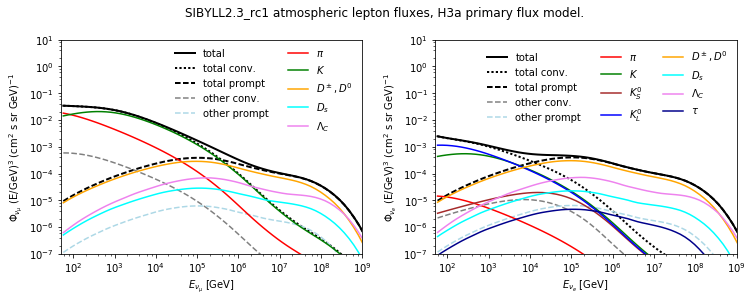

In [13]:
color_spectrum = ['b', 'r', 'g', 'orange', 'cyan', 'violet',
                  'brown', 'pink', 'yellow', 'lightblue']
fig = plt.figure(figsize=(11, 7.5))
fig.set_tight_layout(dict(rect=[0.01, 0.01, 0.97, 0.95]))
e_grid = mceq_run.e_grid
plt.suptitle('{0} atmospheric lepton fluxes, {1} primary flux model.'.format(mceq_run.iamodel_name,
                                                                             mceq_run.pmodel.sname))
'''
plt.subplot(221)        
plt.plot(e_grid, mu_total, ls='-', lw=2, color='black', label='total')
plt.plot(e_grid, mu_conv, ls='dotted', lw=2, color='black', label=r'total conv.')
plt.plot(e_grid, mu_prompt, ls='--', lw=2, color='black', label='total prompt')
plt.plot(e_grid, mu_obs['other prompt'], ls='--', lw=1.5, color='lightblue', label=r'other prompt')
plt.plot(e_grid, mu_obs['other conv. mu'], ls='--', lw=1.5, color='grey', label=r'other conv.')
plt.plot(e_grid, mu_pi, ls='-', lw=1.5, color='red', label=r'$\pi$')
plt.plot(e_grid, mu_k, ls='-', lw=1.5, color='green', label=r'$K$')
plt.plot(e_grid, mu_obs['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
plt.plot(e_grid, mu_obs['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')
plt.plot(e_grid, mu_obs['$\\Lambda_C$'], ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
plt.plot(e_grid, mu_obs['unflavored'], ls='-', lw=1.5, color='pink', label=r'unflavored')

plt.loglog()
plt.xlabel(r"$E_{\mu}$ [GeV]")
plt.ylabel(r"$\Phi_{\mu}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
plt.xlim([50, 1e9])
plt.ylim([1e-6, 1e3])
plt.legend(loc='upper right', frameon=False, numpoints=1, ncol=2)
'''
plt.subplot(221)
plt.plot(e_grid, numu_total, ls='-', lw=2, color='black', label='total')
plt.plot(e_grid, numu_conv, ls='dotted', lw=2, color='black', label=r'total conv.')
plt.plot(e_grid, numu_prompt, ls='--', lw=2, color='black', label='total prompt')
plt.plot(e_grid, numu_obs['other conv. numu'], ls='--', lw=1.5, color='grey', label=r'other conv.')
plt.plot(e_grid, numu_obs['other prompt'], ls='--', lw=1.5, color='lightblue', label=r'other prompt')
plt.plot(e_grid, numu_pi, ls='-', lw=1.5, color='red', label=r'$\pi$')
plt.plot(e_grid, numu_k, ls='-', lw=1.5, color='green', label=r'$K$')
plt.plot(e_grid, numu_obs['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
plt.plot(e_grid, numu_obs['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')
plt.plot(e_grid, numu_obs['$\\Lambda_C$'], ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
plt.loglog()
plt.xlabel(r"$E_{\nu_{\mu}}$ [GeV]")
plt.ylabel(r"$\Phi_{\nu_{\mu}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
plt.xlim([50, 1e9])
plt.ylim([1e-7, 1e1])
plt.legend(loc='upper right', frameon=False, numpoints=1, ncol=2)

plt.subplot(222)
plt.plot(e_grid, nue_total, ls='-', lw=2, color='black', label='total')
plt.plot(e_grid, nue_conv, ls='dotted', lw=2, color='black', label=r'total conv.')
plt.plot(e_grid, nue_prompt, ls='--', lw=2, color='black', label='total prompt')
plt.plot(e_grid, nue_obs['other conv. nue'], ls='--', lw=1.5, color='grey', label=r'other conv.')
plt.plot(e_grid, nue_obs['other prompt'], ls='--', lw=1.5, color='lightblue', label=r'other prompt')
plt.plot(e_grid, nue_pi, ls='-', lw=1.5, color='red', label=r'$\pi$')
plt.plot(e_grid, nue_k, ls='-', lw=1.5, color='green', label=r'$K$')
plt.plot(e_grid, nue_obs['$K^0_s$'], ls='-', lw=1.5, color='brown', label=r'$K^0_S$')
plt.plot(e_grid, nue_obs['$K^0_L$'], ls='-', lw=1.5, color='blue', label=r'$K^0_L$')
# plt.plot(e_grid, nue_obs['$\\mu$ decay'], ls='-', lw=1.5, color='pink', label=r'$\mu$ decay')
plt.plot(e_grid, nue_obs['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
plt.plot(e_grid, nue_obs['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')
plt.plot(e_grid, nue_obs['$\\Lambda_C$'], ls='-', lw=1.5, color='violet', label=r'$\Lambda_C$')
plt.plot(e_grid, nue_obs["tau decay"], ls='-', lw=1.5, color='darkblue', label=r'$\tau$')

plt.loglog()
plt.xlabel(r"$E_{\nu_{e}}$ [GeV]")
plt.ylabel(r"$\Phi_{\nu_{e}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
plt.xlim([50, 1e9])
plt.ylim([1e-7, 1e1])
plt.legend(loc=1, frameon=False, numpoints=1, ncol=3)
'''
plt.subplot(224)
plt.plot(e_grid, nutau_total, ls='-', lw=2, color='black', alpha=0.6, label='total')
plt.plot(e_grid, nutau_obs["tau decay"], ls='-', lw=1.5, color='darkblue', label=r'$\tau$')
plt.plot(e_grid, nutau_obs['$D^\\pm + D^0$'], ls='-', lw=1.5, color='orange', label=r'$D^\pm, D^0$')
plt.plot(e_grid, nutau_obs['$D_s$'], ls='-', lw=1.5, color='cyan', label=r'$D_s$')


plt.loglog()
plt.xlabel(r"$E_{\nu_{\tau}}$ [GeV]")
plt.ylabel(r"$\Phi_{\nu_{\tau}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
plt.xlim([50, 1e9])
plt.ylim([1e-9, 1e-2])
plt.legend(loc=1, frameon=False, numpoints=1, ncol=2)
'''
# plt.savefig('detailed_flux.pdf')
